# Assister Discovery

`Assister discovery` is a software that maps user requests to executable commands in [Assister Pipeline](https://github.com/keyvan-m-sadeghi/assister/tree/assister-conception/rfcs/text/assister-conception#assister-pipeline), illustrated in the following figure. Using [Natural Language Understanding](https://en.wikipedia.org/wiki/Natural-language_understanding) coupled with Machine Learning over the [Terms and Functions](https://github.com/keyvan-m-sadeghi/assister/tree/assister-conception/rfcs/text/assister-conception#terms-and-functions-language-tfx) contextual annotations embedded in an application, a discovery can translate a request to the corresponding command. The command will then be executed within the Pipeline. [[Link to the full proposal]](https://github.com/keyvan-m-sadeghi/assister/tree/assister-conception/rfcs/text/assister-conception)

![Assister_pipeline](img/pipeline.png)

## Problem Statement and Solution

The research task corresponding to the aforementioned real problem at Assister, can be formally defined as:
> `How can we map a user request in natural language to a pre-defined executable command?`

If we had several mappings from user sentences to the requested commands, we would choose a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) approach. This is not a realistic assumption at the current stage, although we know the possible commands (classes) at each context that can be selected for execution. So, we propose an [unsupervised](https://en.wikipedia.org/wiki/Unsupervised_learning) methology to tacke this probelm, as follows:
1. Representation learning of user requests via [word embeddings](https://en.wikipedia.org/wiki/Word_embedding).
2. Finding the best embedding of each command description.
3. Mapping a request to a command with the shortest [distance](https://en.wikipedia.org/wiki/Distance) in the embedding space based on a [similarity measure](https://en.wikipedia.org/wiki/Similarity_measure).

It is obvious that word/sentence-level embedding algorithm is the key part of the solution. So, we first review the literature for this [natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing) (NLP) task. Then, we describe the two recent state-of-the-art embedding models and how Assister utilizes them to embed the requests and comments. Finally, we explain the common similarity measures and pick a suitable one for Assister to calculate the distance between any pair of embeddings. 

## Word Embeddings

Undoubtedly, the year 2018 has been an inflection point for NLP after being relatively stationary for a couple of years. Word embedding is definitely one of the most popular representation of document [vocabulary](https://en.wikipedia.org/wiki/Vocabulary) with the capability of capturing words' [context](https://en.wikipedia.org/wiki/Context_(language_use)) in a document, syntactic and semantic similarity, relation between different words, etc. More formally, embeddings are low-dimensional representations of a data point (sample) in a higher-dimensional [vector space](https://en.wikipedia.org/wiki/Vector_space). In the same way, word embeddings are dense vectorized representations of words in a low-dimensional space. The first [neural network]()-based word embedding model was first proposed by Google in 2013 [[1]](#References). Since then, word embedding has received a lot of attention in almost every NLP model in practice. They are very effective, because by translating a word to an embedding one can model the semantic importance of a word in a numeric form and thus perform many [mathematical operations](https://en.wikipedia.org/wiki/Linear_algebra) on it. To make it more clear, let's take a look at a common example in the literature:
> Let $\phi$ be a word embedding mapping $W \rightarrow \mathbb{R}^n$, where $W$ is the word space and $\mathbb{R}^n$ is an $n$-dimensional vector space, then we have:
>
> $\phi(''king'') - \phi(''man'') + \phi(''woman'') = \phi(''queen'')$

It was first introduced by the [word2vec](https://code.google.com/archive/p/word2vec/) [[2]](#References) model in 2013 that was a great breakthrough. Another fascinating word embedding model was [Glove](https://nlp.stanford.edu/projects/glove/) [[3]](#References) in 2014. Although these two models are powerful, they are __context-free__ in which a single word embedding representation for each word in the vocabulary is generated. So, `bank` would have the same representation in `bank deposit` and `river bank`. Instead, __contextual__  models - including [Semi-supervised Sequence Learning](https://arxiv.org/abs/1511.01432) (2015) [[4]](#References), [Generative Pre-Training](https://openai.com/blog/language-unsupervised/) (2018) [[5]](#References), [ELMO](https://allennlp.org/elmo) (2018) [[6]](#References), [ULMFit](http://nlp.fast.ai/classification/2018/05/15/introducting-ulmfit.html) (2018) [[7]](#References) - generate a representation of each word based on the other  words in the sentence, so they can capture both a static semantic meaning and a contextualized meaning. For instance, the word `apple` in the two sentences `I like apples` and `I like Apple macbooks` has a different semantic meaning, thus the embedding of this word would have a different vector representation which makes it more powerful for NLP tasks. The two recent state-of-the-art models - [USE](https://ai.google/research/pubs/pub46808) (2018) [[8]](#References) and [BERT](https://ai.googleblog.com/2018/11/open-sourcing-bert-state-of-art-pre.html) (2018) [[9]](#References) - use a powerful sequence transductive model for language understanding, called [Transformer](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html) (2017) [[10]](#References). We first review the Transformer model, then describe how the USE and the BERT models take the advantage of using Transformer as a building block.

## Transformer

Today's NLP world benefits from the recent advancements of [Deep Learning](https://en.wikipedia.org/wiki/Deep_learning) research. More specifically, Google introduced a novel neural network architecture, called Transformer, in a seminal paper [[10]](#References) which outperformed many traditional [Recurrent Neural Network](https://en.wikipedia.org/wiki/Recurrent_neural_network) (RNN) sequence models (like [LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory) and [GRU](https://en.wikipedia.org/wiki/Gated_recurrent_unit)). The main advantages of using transformer as a language understanding unit is that (1) it can effectively model the long-term dependencies among words in a temporal word sequence; and (2) its [model training](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) phase is efficient by eliminating the sequential dependency on previous words [[10]](#References).

A transformer is an [encoder-decoder architecture](https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346) model that uses [attention mechanisms](https://skymind.ai/wiki/attention-mechanism-memory-network) to forward a complex pattern of the whole sequence to the decoder at once rather than sequentially as depicted in the following figure [[source](http://mlexplained.com/2017/12/29/attention-is-all-you-need-explained/)]:

![Transformer](img/attention_path_length.png)


## Universal Sequence Encoder (USE)

The USE uses a transformer to provide sentence-level embeddings as easy as it has historically been to look up the embeddings for individual words, $e.g.$ word2vec. The universal sentence encoder is a model that encodes a text into 512-dimensional embeddings. The resulted embeddings can then be used as inputs to NLP tasks such as [sentiment classification](https://en.wikipedia.org/wiki/Sentiment_analysis) and [textual similarity](https://en.wikipedia.org/wiki/Semantic_similarity) analysis. Pre-trained word embeddings are considered to be an integral part of modern NLP systems, offering significant improvements over embeddings learned from scratch. A pre-trained and optimized USE model on a variety of data sources is publicly available on [TenforFlow Hub](https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb#scrollTo=RUymE2l9GZfO). This module is about 800MB and depending on your network speed it might take a whileto load the first time you instantiate it. After that, loading the module should be faster as modules are [cached](https://www.tensorflow.org/hub/basics) by default. Now, we use the universal sequence encoder's TF Hub module to compute a representation (embedding) for user requests and command descriptions in an online spreadsheet application, over [TensorFlow platform](https://www.tensorflow.org/).

In [41]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# Import the USE's TF Hub module
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
module = hub.Module(module_url)

# Compute embeddings for sentences (either of user requests or command descriptions)
requests = ["Format cell A12 as date",
            "Sum the values in column B and store the result in cell C7",
            "Delete cell D20",
            "Delete row 15",
            "Select cells from B16 to E19"]
commands = ["To Format a cell, you need a cell, like B10, and a type, like date",
            "To sum a column, you need a column, like C, and a cell, like A5, to store the result",
            "To delete a cell, you need a cell, like C11",
            "To delete a row, you need a row, like 12",
            "To select cells, you need a start cell, like B7, and an end cell, like D17"]
sentences = requests + commands

# Run the embeddings in a TensorFlow session
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    sentence_embeddings = session.run(module(sentences))
    for i, sentence_embedding in enumerate(np.array(sentence_embeddings).tolist()):
        print("Sentence: {}".format(sentences[i]))
        print("Embedding size: {}".format(len(sentence_embedding)))
        embedding_short = ", ".join((str(x) for x in sentence_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(embedding_short))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0426 14:52:12.629750 140734900516288 saver.py:1483] Saver not created because there are no variables in the graph to restore


Sentence: Format cell A12 as date
Embedding size: 512
Embedding: [-0.050871364772319794, -0.0016370579833164811, 0.022183720022439957, ...]

Sentence: Sum the values in column B and store the result in cell C7
Embedding size: 512
Embedding: [-0.03197444975376129, 0.02532351016998291, 0.010689766146242619, ...]

Sentence: Delete cell D20
Embedding size: 512
Embedding: [-0.038657110184431076, 0.049386851489543915, 0.000588558497838676, ...]

Sentence: Delete row 15
Embedding size: 512
Embedding: [-0.04079856723546982, 0.020178884267807007, -0.03739866614341736, ...]

Sentence: Select cells from B16 to E19
Embedding size: 512
Embedding: [-0.024356713518500328, 0.029383739456534386, 0.012827333062887192, ...]

Sentence: To Format a cell, you need a cell, like B10, and a type, like date
Embedding size: 512
Embedding: [-0.032455652952194214, 0.04132832959294319, 0.012323660776019096, ...]

Sentence: To sum a column, you need a column, like C, and a cell, like A5, to store the result
Embeddin

### Semantic Similarity between Requests and Commands via the USE

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The [semantic similarity](https://en.wikipedia.org/wiki/Semantic_similarity) between any pair of user requests and commands descriptions, which can be simply the [inner product](https://en.wikipedia.org/wiki/Inner_product_space) of the encodings, could be an informative analysis in Assister discovery. Inner product space is a proper metric in our case, as it satisfies the three well-known axioms: [Conjugate](https://en.wikipedia.org/wiki/Complex_conjugate) symmetry, [Linearity](https://en.wikipedia.org/wiki/Linearity#In_mathematics) property, and [Positive-definite](https://en.wikipedia.org/wiki/Definite_quadratic_form#Associated_symmetric_bilinear_form).

In [62]:
def plot_similarity(labels, embeddings, rotation):
  inner = np.inner(embeddings[:len(requests)], embeddings[len(requests):])
  sns.set(font_scale=1.2)
  g1 = sns.heatmap(
      inner,
      annot=True,
      xticklabels=labels[len(requests):],
      yticklabels=labels[:len(requests)],
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
  g1.set_xticklabels(labels[len(requests):], rotation=rotation)
  g1.set_yticklabels(labels[:len(requests)])
  g1.set_title("Semantic Similarity based on Inner Product of Embeddings")

def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)

Now, we plot the similarity in a heat map. It is a matrix with `No of requests` rows and `No of commands` columns, where each entry $[i, j]$ is colored based on the inner product of the embeddings for user request $i$ and command description $j$. In this test, we use the aforementioned examples in the requests and commands lists, which are matched one-to-one. The higher the score at each entry is, the corresponding request and command are more similar. We expect to have higher similarity scores on the diagonal of the heat map.

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0426 15:57:15.830905 140734900516288 saver.py:1483] Saver not created because there are no variables in the graph to restore


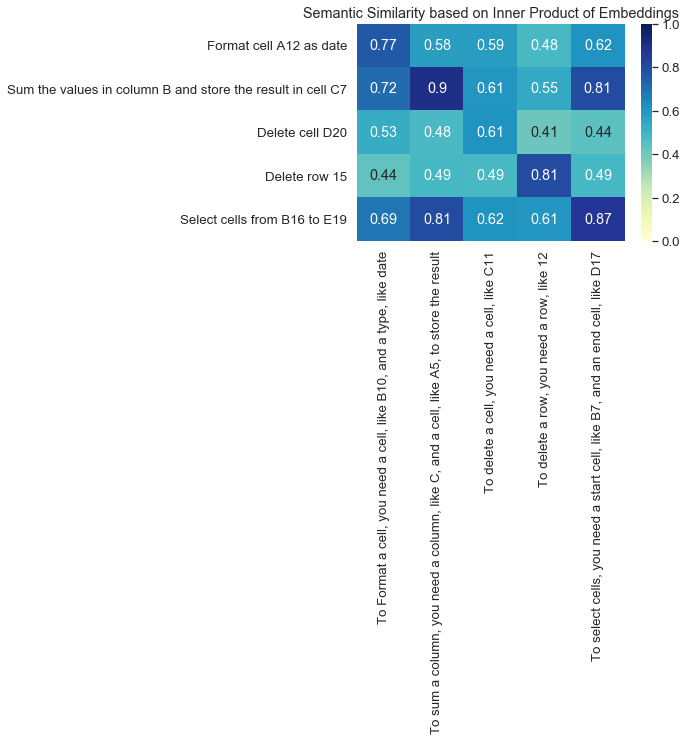

In [63]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = module(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, sentences, similarity_message_encodings)

## Bidirectional Encoder Representations from Transformer (BERT)



# References

[1] Mikolov, T., I. Sutskever, K. Chen, G. Corrado and J. Dean, Distributed Representations of Words and Phrases and their Compositionality (2013)

[2] Mikolov, T., Chen, K., Corrado, G., Dean, J., Sutskever, L. and Zweig, G., Efficient Estimation of Word Representations in Vector Space (2013)

[3] Pennington, J., Socher, R. and Manning, C., Glove: Global vectors for word representation (2014)

[4] Dai, A.M. and Le, Q.V., Semi-supervised sequence learning (2015)

[5] Radford, A., Narasimhan, K., Salimans, T. and Sutskever, I., Improving language understanding by generative pre-training (2018)

[6] Peters, M.E., Neumann, M., Iyyer, M., Gardner, M., Clark, C., Lee, K. and Zettlemoyer, L., Deep contextualized word representations (2018)

[7] Howard, J. and Ruder, S., Universal language model fine-tuning for text classification (2018)

[8] Cer, D., Yang, Y., Kong, S.Y., Hua, N., Limtiaco, N., John, R.S., Constant, N., Guajardo-Cespedes, M., Yuan, S., Tar, C. and Sung, Y.H., Universal sentence encoder (2018)

[9] Devlin, J., Chang, M.W., Lee, K. and Toutanova, K., Bert: Pre-training of deep bidirectional transformers for language understanding (2018)

[10] A. Vaswani, N. Shazeer, N. Parmar, J. Uszkoreit, L. Jones, A.Gomez, L. Kaiser and I. Polosukhin, Attention Is All You Need (2017)

[1] J.Devlin, M. Chang, K. Lee and K. Toutanova, BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding (2018)

[2] Radford, Alec, Wu, Jeff, Child, Rewon, Luan, David, Amodei, Dario, Sutskever, Ilya, Language Models are Unsupervised Multitask Learners (2019)

[3] M. Peters, M. Neumann, M. Iyyer, M. Gardner, C. Clark, K.Lee and L.Zettlemoyer, Deep contextualized word representations (2018), North American Chapter of the Association for Computational Linguistics

[6] Y. Wu, M. Schuster, Z. Chen, Q. Le, M. Norouzi, W. Macherey, M. Krikun, Y. Cao, Q. Gao, K. Macherey, J. Klingner, A. Shah, M. Johnson, X. Liu, Ł. Kaiser, S. Gouws, Y. Kato, T. Kudo, H. Kazawa, K. Stevens, G. Kurian, N. Patil, W. Wang, C. Young, J. Smith, J. Riesa, A. Rudnick, O. Vinyals, G. Corrado, M. Hughes and J. Dean Google’s Neural Machine Translation System: Bridging the Gap between Human and Machine Translation (2016)